<a href="https://colab.research.google.com/github/TonyLau0524/Python-Project---Web-Scraping/blob/main/Python_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests beautifulsoup4 requests-html

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=9482c1330365b93f8964198c02eb83fdec6e6a380aeaaf4045b5de652ab52892
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests

In [3]:
base_url = 'https://www.imdb.com/search/title/?groups=top_1000&start='
step = 50

In [4]:
filmlist = []

In [5]:
for i in range(1,1000,step):
  url = f'{base_url}{i}&ref_=adv_nxt'
  html_content = requests.get(url).text
  soup = BeautifulSoup(html_content, 'lxml')
  film_info = soup.find_all('div', class_ = 'lister-item mode-advanced')

  for film in film_info:
        film_order = film.h3.span.text
        film_title = film.h3.a.text
        film_year = film.h3.select_one('span:last-of-type').text.split()[-1]
        film_category = film.find('span', class_='genre').get_text(strip=True)
        film_time = film.find('span', class_='runtime').get_text()
        film_ratings = film.find('span', class_='certificate')
        if film_ratings:

           film_ratings = film.find('span', class_='certificate').get_text()

        else:
           film_ratings = "Not Rated"

        p_tag = film.find('p', class_='')

        # Extract text from the <p> element
        p_text = p_tag.get_text()

        # Split the text by "|"
        sections = p_text.split('|')
        director_names = []
        star_names = []

        for section in sections:
          if "Director:" in section:
              # Extract directors if "Director:" is in this section
              director_section = section.replace("Director:", "")
              director_names.extend([director.strip() for director in director_section.split(',')])
          elif "Directors:" in section:
              # Extract directors if "Directors:" is in this section
              director_section = section.replace("Directors:", "")
              director_names.extend([director.strip() for director in director_section.split(',')])
          elif "Stars:" in section:
              # Extract stars if "Stars:" is in this section
              star_section = section.replace("Stars:", "")
              star_names.extend([star.strip() for star in star_section.split(',')])











        votes_span = film.find('span', string='Votes:')

        # Check if the "Votes:" span is found and extract the associated number
        if votes_span:
            # Navigate to the next sibling, which is the span containing the number
            votes_number = votes_span.find_next('span', attrs={"name": "nv"})

            if votes_number:
                votes_value = votes_number.text

            else:
                votes_value = "Number of votes not found."
        else:
            votes_value = "Number of votes not found."
        #film_gross = film.find_all(('span', {'name': 'nv', 'data-value': True})[-1]
        gross_span = film.find('span', string='Gross:')

        # Check if the "Votes:" span is found and extract the associated number
        if gross_span:
            # Navigate to the next sibling, which is the span containing the number
            gross_amount = gross_span.find_next('span', attrs={"name": "nv"})['data-value']

            if gross_amount:
                gross_value = gross_amount

            else:
                gross_value = "Gross not found"
        else:
            gross_value = "Gross not found"



        filmtable = {
            'order' : film_order,
            'title' : film_title,
            'year' : film_year,
            'category' : film_category,
            'time' : film_time,
            'ratings' : film_ratings,
            'director' : director_names,
            'stars' : star_names,
            'vote' : votes_value,
            'gross' : gross_value



        }
        filmlist.append(filmtable)


In [6]:
film_df = pd.DataFrame(filmlist)

In [7]:
film_df

,order,title,year,category,time,ratings,director,stars,vote,gross
0,1.,Killers of the Flower Moon,(2023),"Crime, Drama, History",206 min,R,[Martin Scorsese],"[Leonardo DiCaprio, Robert De Niro, Lily Glads...","63,401",Gross not found
1,2.,Mission: Impossible - Dead Reckoning Part One,(2023),"Action, Adventure, Thriller",163 min,PG-13,[Christopher McQuarrie],"[Tom Cruise, Hayley Atwell, Ving Rhames, Simon...","175,274",Gross not found
2,3.,Oppenheimer,(2023),"Biography, Drama, History",180 min,R,[Christopher Nolan],"[Cillian Murphy, Emily Blunt, Matt Damon, Robe...","471,124",Gross not found
3,4.,The Nightmare Before Christmas,(1993),"Animation, Family, Fantasy",76 min,PG,[Henry Selick],"[Danny Elfman, Chris Sarandon, Catherine O'Har...","363,182","75,082,668"
4,5.,The Exorcist,(1973),Horror,122 min,R,[William Friedkin],"[Ellen Burstyn, Max von Sydow, Linda Blair, Le...","442,340","232,906,145"
...,...,...,...,...,...,...,...,...,...,...
995,996.,Sarfarosh,(1999),"Action, Crime, Drama",174 min,Not Rated,[John Mathew Matthan],"[Naseeruddin Shah, Aamir Khan, Sonali Bendre, ...","26,499",Gross not found
996,997.,Drishyam 2,(2021),"Crime, Drama, Thriller",152 min,Not Rated,[Jeethu Joseph],"[Mohanlal, Meena, Ansiba, Esther Anil]","39,901",Gross not found
997,998.,Drishyam,(2013),"Crime, Drama, Thriller",160 min,Not Rated,[Jeethu Joseph],"[Mohanlal, Meena, Asha Sharath, Ansiba]","43,229",Gross not found
998,999.,Airlift,(2016),"Action, Drama, History",130 min,Not Rated,[Raja Menon],"[Akshay Kumar, Nimrat Kaur, Kumud Mishra, Prak...","58,303",Gross not found


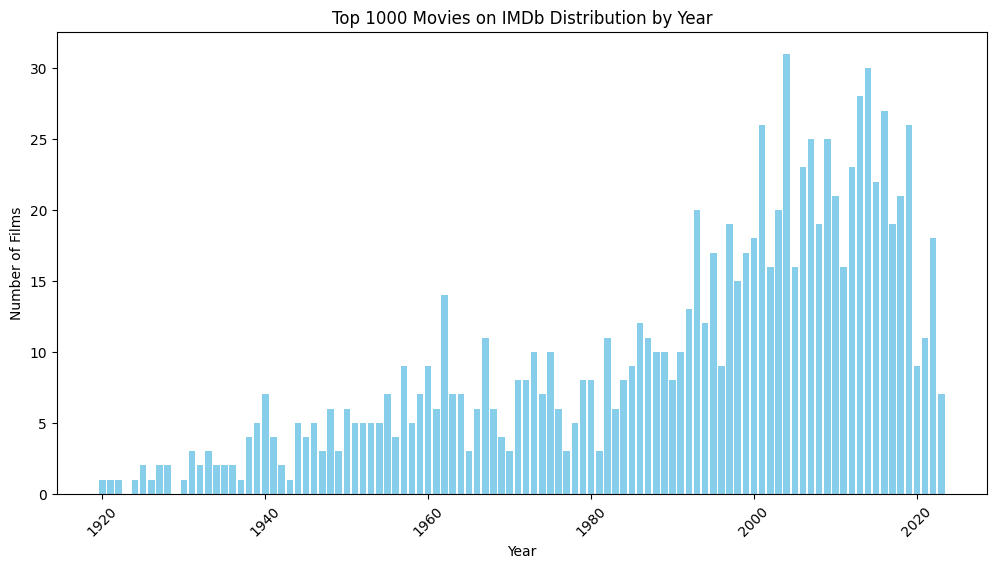

In [8]:
film_df['year'] = film_df['year'].astype(str)

# Extract the 4-digit year from the 'year' column and convert it to float
film_df['year'] = film_df['year'].str.extract(r'(\d{4})').astype(float)

# Count the number of films per year and sort by year
year_counts = film_df['year'].value_counts().sort_index()

# Create a bar chart to visualize the count of films in different years
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Top 1000 Movies on IMDb Distribution by Year')
plt.xticks(rotation=45)
plt.show()

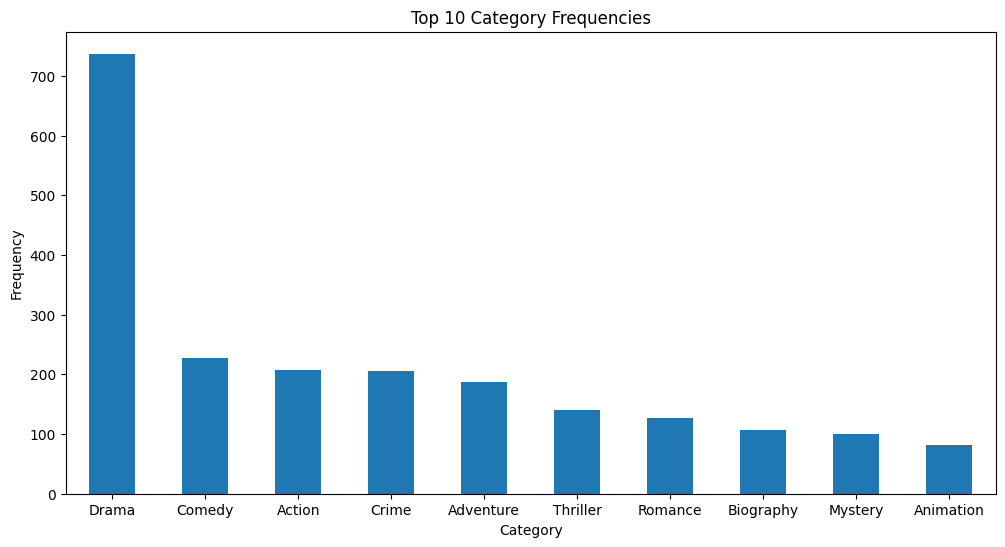

In [9]:
categories = film_df['category'].str.split(', ').explode()

# Count the occurrences of each category
category_counts = categories.value_counts().head(10)

# Plot a histogram of category frequencies
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Top 10 Category Frequencies')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

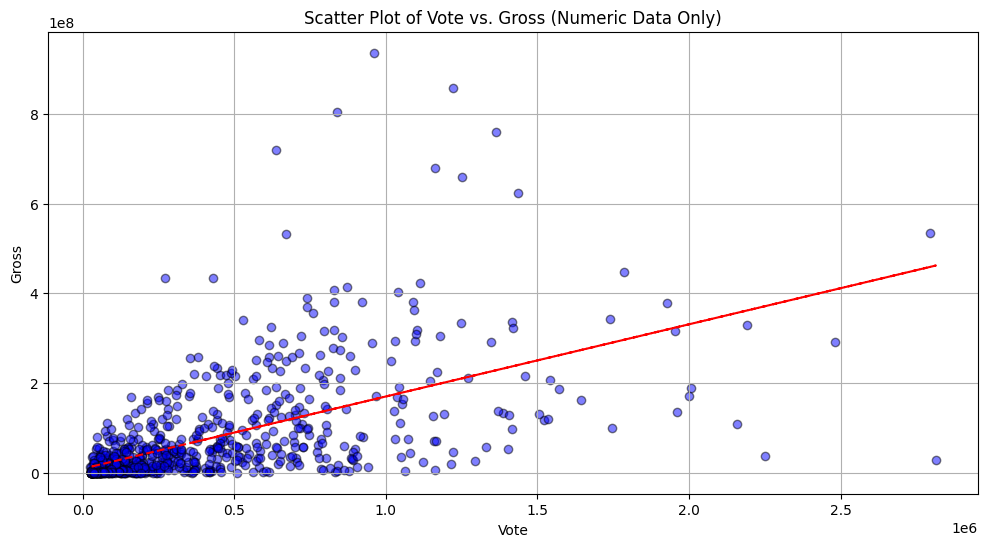

In [10]:
film_df1 = film_df.copy()
film_df1 = film_df1[film_df1['gross'] != 'Gross not found']
film_df1['vote'] = film_df1['vote'].str.replace(',', '').astype(int)
film_df1['gross'] = film_df1['gross'].str.replace(',', '').astype(int)



correlation = film_df1['vote'].corr(film_df1['gross'])

# Create the scatter plot with a correlation line
plt.figure(figsize=(12, 6))
plt.scatter(film_df1['vote'], film_df1['gross'], alpha=0.5, color='b', edgecolors='k')

z = np.polyfit(film_df1['vote'], film_df1['gross'], 1)
p = np.poly1d(z)
plt.plot(film_df1['vote'],p(film_df1['vote']),"r--")



plt.title('Scatter Plot of Vote vs. Gross (Numeric Data Only)')
plt.xlabel('Vote')
plt.ylabel('Gross')
plt.grid(True)


plt.show()



In [11]:
correlation = film_df1['vote'].corr(film_df1['gross'])

print("Correlation between 'vote' and 'gross':", correlation)

Correlation between 'vote' and 'gross': 0.5812370714990298


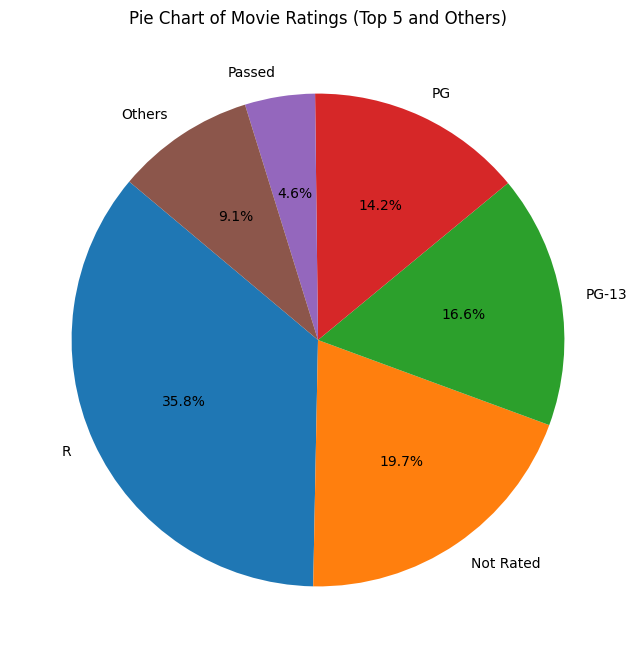

In [12]:
ratings_counts = film_df['ratings'].value_counts()


# Select the top 5 ratings and their counts
top_5_ratings = ratings_counts.head(5)

# Calculate the count of all other ratings as "Others"
others_count = ratings_counts[5:].sum()

# Create a new series that combines the top 5 ratings and "Others" using pandas.concat
combined_ratings = pd.concat([top_5_ratings, pd.Series({'Others': others_count})])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_ratings, labels=combined_ratings.index, autopct='%1.1f%%', startangle=140,)
plt.title('Pie Chart of Movie Ratings (Top 5 and Others)')

plt.show()

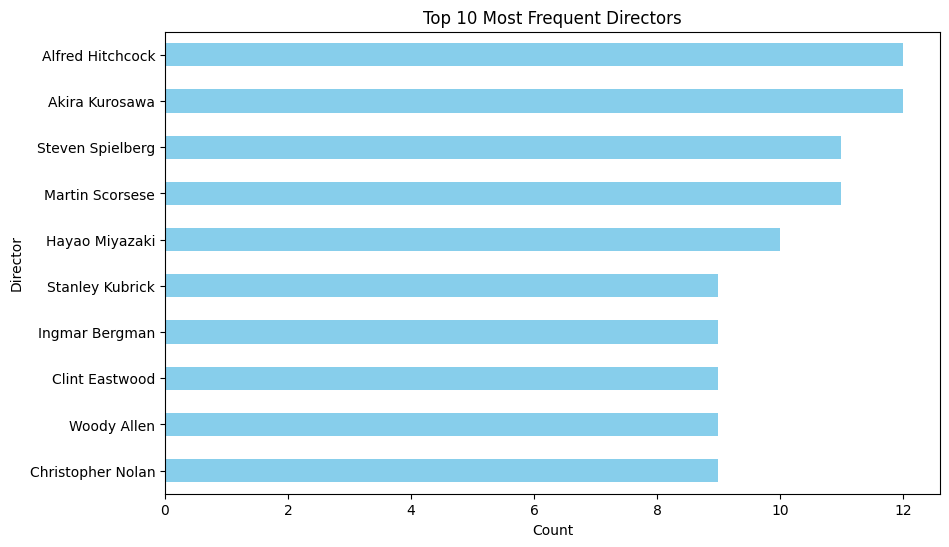

In [13]:
film_df2 = film_df.copy()
film_df2['director'] = film_df2['director'].apply(lambda x: ', '.join(x))

# Create a list of all director names
all_directors = [director for directors in film_df2['director'] for director in directors.split(', ')]

# Count the occurrences of each director
director_counts = pd.Series(all_directors).value_counts()

# Get the top N most frequent directors (adjust N as needed)
top_n_directors = director_counts.head(10)

# Create a bar chart for the top N directors
plt.figure(figsize=(10, 6))
top_n_directors.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.ylabel('Director')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Directors')
plt.show()

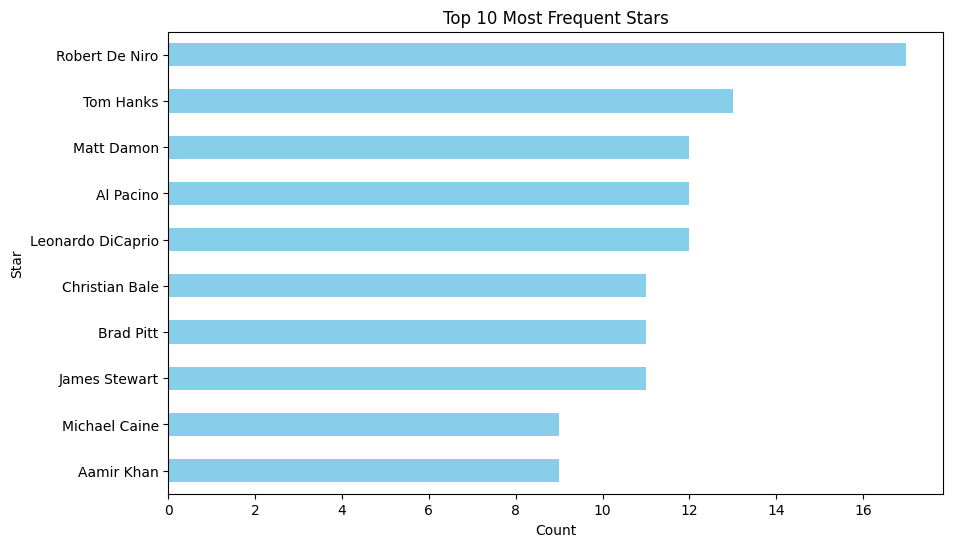

In [14]:
film_df2 = film_df.copy()
film_df2['stars'] = film_df2['stars'].apply(lambda x: ', '.join(x))

# Create a list of all director names
all_stars = [star for stars in film_df2['stars'] for star in stars.split(', ')]

# Count the occurrences of each director
stars_counts = pd.Series(all_stars).value_counts()

# Get the top N most frequent directors (adjust N as needed)
top_n_stars = stars_counts.head(10)

plt.figure(figsize=(10, 6))
top_n_stars.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Star')
plt.title('Top 10 Most Frequent Stars')
plt.show()

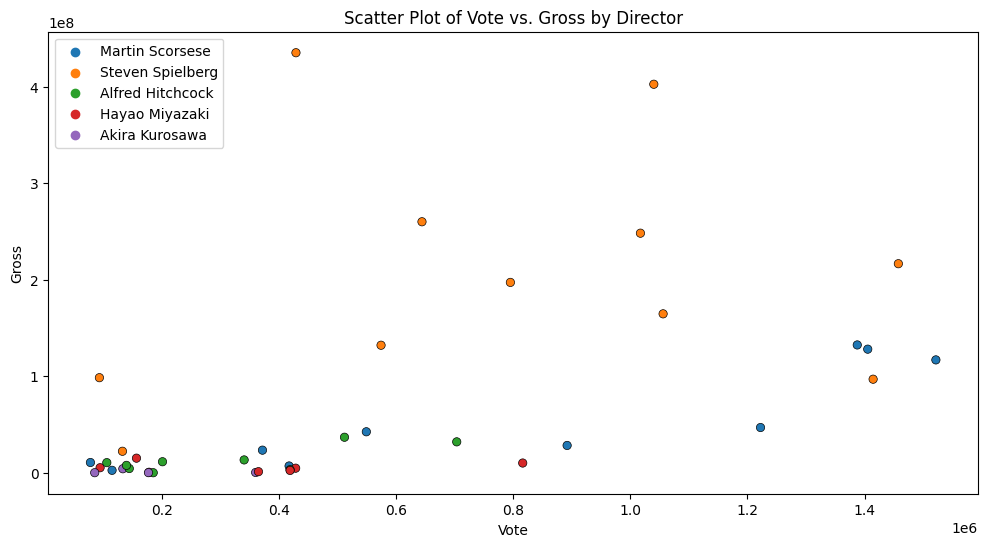

In [15]:

top_director_names = director_counts.head(5).index.tolist()
filter_condition = film_df1['director'].str[0].isin(top_director_names)

# Apply the filter to get the filtered DataFrame
ff_df = film_df1[filter_condition]
filtered_directors_df = ff_df[ff_df['director'].apply(lambda directors: len(directors) == 1)]
filtered_directors_df_copy = filtered_directors_df.copy()
filtered_directors_df_copy['director'] = filtered_directors_df_copy['director'].str.join(', ')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='vote', y='gross',hue='director', data=filtered_directors_df_copy, color='b', edgecolor='k')
plt.legend(loc='upper left')
plt.title('Scatter Plot of Vote vs. Gross by Director')
plt.xlabel('Vote')
plt.ylabel('Gross')
plt.show()
